# Encoder-Decoder Without Attention

encoder-decoder model 은 sequence-to-sequence 예측 문제에 사용되는 모델이다.
아래 두 sub-model로 구성되어 있다.

- **Encoder** : The encoder is responsible for stepping through the input time steps and encoding the entire sequence into a fixed length vector called a context vector.
- **Decoder** : The decoder is responsible for stepping through the output time steps while reading from the context vector.

이 모델은 encoder 가 고정된 길이의 context vector 를 만들기 때문에 긴 input, output sequence 에 대해 성능이 좋지 않다.

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import socket
hostname = socket.gethostname()
print(hostname)

devbox20


### 라이브러리

In [3]:
from random import randint
from numpy import array
from numpy import argmax

In [4]:
# generate a sequence of random integers
def generate_sequence(length, n_unique):
    return [randint(0, n_unique-1) for _ in range(length)]

In [5]:
# generate random sequence
sequence = generate_sequence(5, 50)
print(sequence)

[30, 5, 1, 26, 6]


#### one hot encode / decode

In [6]:
# one hot encode sequence
def one_hot_encode(sequence, n_unique):
    encoding = list()
    for value in sequence:
        vector = [0 for _ in range(n_unique)]
        vector[value] = 1
        encoding.append(vector)
    return array(encoding)

In [7]:
# decode a one hot encoded string
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]

In [8]:
# generate random sequence
sequence = generate_sequence(5, 50)
print("* random sequence : ", sequence)
# one hot encode
encoded = one_hot_encode(sequence, 50)
print("* one hot encoded version :\n", encoded)
# decode
decoded = one_hot_decode(encoded)
print("* decoded sequence :", decoded)

* random sequence :  [1, 10, 6, 16, 3]
* one hot encoded version :
 [[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
* decoded sequence : [1, 10, 6, 16, 3]


input/output 쌍을 만들어야한다.<br>
input과 output은 같은 사이즈이고, 

In [9]:
# prepare data for the LSTM
def get_pair(n_in, n_out, n_unique):
    # generate random sequence
    sequence_in = generate_sequence(n_in, n_unique)
    sequence_out = sequence_in[:n_out] + [0 for _ in range(n_in-n_out)]
    
    # one hot encode
    X = one_hot_encode(sequence_in, n_unique)
    y = one_hot_encode(sequence_out, n_unique)
    
    # reshape as 3D
    X = X.reshape((1, X.shape[0], X.shape[1]))
    y = y.reshape((1, y.shape[0], y.shape[1]))
    
    return X,y

In [10]:
# generate random sequence
X, y = get_pair(5, 2, 50)
print("X.shape", X.shape)
print("y.shape", y.shape)

print('decode X=%s, y=%s' % (one_hot_decode(X[0]), one_hot_decode(y[0])))
print('** X=\n%s\n** y=\n%s' % ( X[0], y[0]))


X.shape (1, 5, 50)
y.shape (1, 5, 50)
decode X=[39, 30, 20, 21, 31], y=[39, 30, 0, 0, 0]
** X=
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
** y=
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

**문제 정의하기**<br>
time step 은 50, output sequence 는 input sequence 의 처음 2개, feature 는 50 

In [11]:
# configure problem
n_features = 50
n_timesteps_in = 5
n_timesteps_out = 2

**encoder-decoder model...**<br>
encoder LSTM 모델의 출력을 가져와 output sequence 의  timestep 만큼 n 회 반복하고 decoder 를 사용해 output sequence 를 예측

In [12]:
from numpy import array_equal
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector

# define model
model = Sequential()
model.add(LSTM(150, input_shape=(n_timesteps_in, n_features)))
model.add(RepeatVector(n_timesteps_in))
model.add(LSTM(150, return_sequences=True))
model.add(TimeDistributed(Dense(n_features, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               120600    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 5, 150)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 150)            180600    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 5, 50)             7550      
Total params: 308,750
Trainable params: 308,750
Non-trainable params: 0
_________________________________________________________________


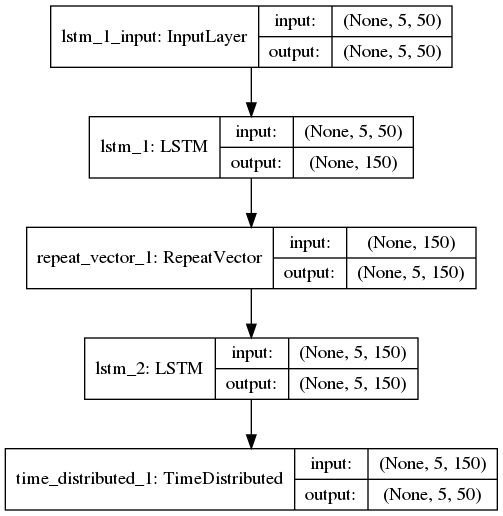

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
# from IPython.display import Image
# Image('model.png')

In [15]:
# train LSTM
for epoch in range(5000):
    # generate new random sequence
    X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
    
    # fit model for one epoch on this sequence
    model.fit(X, y, epochs=1, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
 - 1s - loss: 3.9188 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.9015 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.9048 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.8908 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.8701 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.8745 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.8396 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.8549 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.8185 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.7736 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.8034 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.7807 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.7382 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.7510 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.6715 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.5503 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.5142 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.5322 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.3595 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.3022 - acc: 

Epoch 1/1
 - 0s - loss: 1.6821 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6891 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6260 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6120 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5403 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.8154 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6722 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6359 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6247 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6503 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6007 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5203 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.6089 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6679 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5763 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5608 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5813 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5809 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5543 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6212 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5343 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6362 - acc: 0.6000
Epoch 1/1


 - 0s - loss: 1.6522 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5786 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5964 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6425 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5231 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5809 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6615 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.7013 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5418 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5091 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6379 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6014 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5855 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5280 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6032 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6291 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6811 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5918 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6040 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4677 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5115 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.5864 - acc: 0.6000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 1.6175 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5150 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6314 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6813 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5431 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5898 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5506 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5931 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5589 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5694 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5262 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5697 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5928 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5507 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5970 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6688 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5347 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5375 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5669 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.5712 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5934 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5511 - acc: 0.6000
Epoch 1/1


 - 0s - loss: 1.6376 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5793 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4914 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6175 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4719 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.3851 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6211 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4986 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6104 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4931 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6549 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5899 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6893 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4384 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5674 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4794 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5987 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5965 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5744 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6754 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6435 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6624 - acc: 0.6000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 1.5994 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4023 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6038 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4299 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6557 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4045 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.5628 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.1517 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.3602 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4998 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.3300 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4362 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6894 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6675 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6008 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5140 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4234 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5398 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.1665 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.9249 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5787 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0286 - acc: 0.8000
Epoch 1/1


 - 0s - loss: 1.1667 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4957 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5195 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.0511 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.3880 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.9930 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.3343 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.3478 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5639 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5879 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4993 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4463 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5950 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.0215 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2531 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6275 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6008 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.8568 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.6243 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2708 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.3067 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4457 - acc: 0.8000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 1.2011 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5221 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5189 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5715 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.3818 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3205 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4212 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3846 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4477 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6338 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2527 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1942 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3925 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.0793 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5989 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.5654 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.0226 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4017 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.6195 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.1412 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5744 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.1705 - acc: 0.6000
Epoch 1/1


 - 0s - loss: 1.2936 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.1846 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3618 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2802 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0686 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5227 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.0067 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.7658 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2588 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6506 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2743 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0282 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.9328 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1986 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.3762 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.1205 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2886 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4122 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.1481 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3985 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.1354 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.8936 - acc: 0.6000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 1.6836 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2643 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.7168 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0523 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.0691 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.1904 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1971 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8756 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8823 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.7610 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4762 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1533 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.9208 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.9051 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.9570 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.7813 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.8634 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3223 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2800 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5898 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5815 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5839 - acc: 0.6000
Epoch 1/1


 - 0s - loss: 0.6749 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.8424 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2419 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2529 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5855 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3855 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9799 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3272 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2781 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.0318 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.3321 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.8154 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.6213 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8675 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9446 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.8101 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0843 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.0007 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0697 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1133 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2973 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4797 - acc: 0.8000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.8490 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7610 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3346 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3090 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1888 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8899 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0164 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0002 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9688 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.9615 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.8152 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4248 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7178 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8865 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7526 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9036 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.7180 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8297 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.9605 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.0540 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5038 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2381 - acc: 0.6000
Epoch 1/1


 - 0s - loss: 0.8762 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8282 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0891 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9487 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7850 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0497 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8499 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.4894 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9875 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6237 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0225 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.9345 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2029 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6900 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6292 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9002 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.0122 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7673 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0345 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.9486 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4163 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3966 - acc: 0.6000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.7104 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9974 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.9500 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7099 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.5712 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2425 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5716 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4846 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0932 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.5875 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9432 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0067 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.4903 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0777 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2210 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9721 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6814 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2303 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2314 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.8438 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.7227 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8715 - acc: 0.6000
Epoch 1/1


 - 0s - loss: 1.6633 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0936 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8037 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2737 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6207 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9707 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0254 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3540 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2207 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4584 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9398 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7481 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5832 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2687 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1498 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6149 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6179 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9799 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0547 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6793 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0526 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6592 - acc: 0.8000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.7983 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9385 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9797 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.8912 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0805 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5878 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2849 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7938 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9028 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.6917 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8557 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0560 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9162 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.9429 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8410 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0003 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7475 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5855 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7460 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4206 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3119 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9594 - acc: 0.8000
Epoch 1/1


 - 0s - loss: 0.7162 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5870 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6577 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7540 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.9441 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6792 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7759 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7174 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7093 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8009 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5411 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8031 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0030 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1210 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.4786 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8366 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3050 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.6693 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8004 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3276 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6512 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8835 - acc: 0.8000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.9097 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3430 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1718 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6441 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7366 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7428 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5210 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5626 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0547 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3080 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7102 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4323 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1306 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1092 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0301 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.4568 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6104 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3503 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7243 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7800 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4923 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5076 - acc: 1.0000
Epoch 1/1


 - 0s - loss: 0.7044 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4801 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3279 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9074 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1354 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0165 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6761 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6798 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0045 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4978 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2600 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5360 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8859 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2561 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2097 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4606 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6756 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9914 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.5443 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6139 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6414 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5746 - acc: 0.8000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.5366 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6430 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6646 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6338 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5542 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9563 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5851 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8549 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5924 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5698 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2349 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1530 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4359 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5186 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6818 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7320 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9199 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7765 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.5896 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2061 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5974 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1545 - acc: 0.8000
Epoch 1/1


 - 0s - loss: 0.7247 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2550 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4606 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9372 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6140 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2511 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5664 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7611 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5928 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4321 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5940 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5234 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7629 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5277 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0255 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5222 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1243 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6406 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5200 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6693 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4054 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7273 - acc: 0.8000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.6495 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4817 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6003 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0414 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9207 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8577 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2630 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.4292 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4178 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6663 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1233 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0568 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3417 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4682 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5834 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8228 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3845 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6115 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8825 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2290 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4063 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3665 - acc: 0.8000
Epoch 1/1


 - 0s - loss: 0.5139 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0211 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0917 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7044 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6760 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2629 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5187 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8237 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9195 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2546 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4581 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.1737 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.5919 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8064 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4320 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7426 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8083 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9889 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5500 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6109 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4627 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6168 - acc: 0.8000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 1.0288 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7110 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8907 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7756 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4890 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6069 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6095 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5117 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6227 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3303 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4721 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8641 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0159 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4004 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8201 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1995 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0641 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6028 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9598 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4712 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6575 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4454 - acc: 0.8000
Epoch 1/1


 - 0s - loss: 0.7420 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6799 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7741 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.4806 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9647 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3415 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7328 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4289 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9313 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0220 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9354 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5921 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6448 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4145 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2111 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8808 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3887 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8259 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6571 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0649 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4444 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5129 - acc: 0.8000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.7689 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.9568 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2697 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3347 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4556 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4800 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5499 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2356 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5823 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7189 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4793 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5013 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4726 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5699 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6805 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3757 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8192 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3637 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5064 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4109 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4633 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4108 - acc: 0.8000
Epoch 1/1


 - 0s - loss: 0.7944 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7962 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5477 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3125 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3980 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4751 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4706 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1715 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5338 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6645 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7444 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3175 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4462 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4371 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4902 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6169 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6959 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7015 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7690 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6752 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2056 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2627 - acc: 1.0000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.6220 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4779 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6018 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3637 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6450 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6288 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5300 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4217 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0546 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7079 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6179 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5597 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3289 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5750 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1876 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0122 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2657 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7513 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5506 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2339 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6601 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8052 - acc: 0.8000
Epoch 1/1


In [29]:
# evaluate LSTM
total, correct = 100, 0
for _ in range(total):
    X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
    yhat = model.predict(X, verbose=0)
    if array_equal(one_hot_decode(y[0]), one_hot_decode(yhat[0])):
        correct += 1
print('Accuracy: %.2f%%' % (float(correct)/float(total)*100.0))

Accuracy: 18.00%


첫번째 output 은 제대로 예측이 되지만 두번째 output 은 맞지 않는 것 확인 가능<br>
padding 0 도 제대로 예측이 된다.

In [17]:
# spot check some examples
for _ in range(10):
    X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
    yhat = model.predict(X, verbose=0)
    print('Expected:', one_hot_decode(y[0]), 'Predicted', one_hot_decode(yhat[0]))

Expected: [48, 18, 0, 0, 0] Predicted [48, 48, 0, 0, 0]
Expected: [39, 21, 0, 0, 0] Predicted [39, 39, 0, 0, 0]
Expected: [20, 21, 0, 0, 0] Predicted [21, 21, 0, 0, 0]
Expected: [9, 12, 0, 0, 0] Predicted [9, 12, 0, 0, 0]
Expected: [15, 47, 0, 0, 0] Predicted [15, 15, 0, 0, 0]
Expected: [24, 24, 0, 0, 0] Predicted [24, 24, 0, 0, 0]
Expected: [34, 25, 0, 0, 0] Predicted [34, 34, 0, 0, 0]
Expected: [28, 13, 0, 0, 0] Predicted [28, 28, 0, 0, 0]
Expected: [44, 11, 0, 0, 0] Predicted [44, 44, 0, 0, 0]
Expected: [6, 37, 0, 0, 0] Predicted [6, 6, 0, 0, 0]


## Encoder-Decoder With Attention

In [18]:
from attention_decoder import AttentionDecoder

# define model
model2 = Sequential()
model2.add(LSTM(150, input_shape=(n_timesteps_in, n_features), return_sequences=True))
model2.add(AttentionDecoder(150, n_features))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5, 150)            120600    
_________________________________________________________________
AttentionDecoder (AttentionD (None, 5, 50)             243300    
Total params: 363,900
Trainable params: 363,900
Non-trainable params: 0
_________________________________________________________________


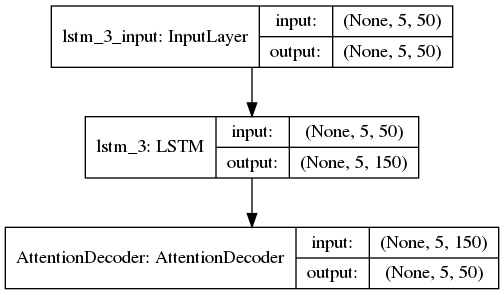

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='model2.png', show_shapes=True)
# from IPython.display import Image
# Image('model.png')

In [21]:
# train LSTM
for epoch in range(5000):
    # generate new random sequence
    X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
    # fit model for one epoch on this sequence
    model2.fit(X, y, epochs=1, verbose=2)

Epoch 1/1
 - 1s - loss: 3.9107 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.9036 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 3.8673 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.8145 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 3.8362 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.8039 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.7905 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.7651 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.6783 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.6901 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.6922 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.6654 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.6257 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.5159 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.5341 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.5103 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.3300 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 3.3501 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.0872 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 3.2084 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 2.9202 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 2.6045 - acc: 0.6000
Ep

Epoch 1/1
 - 0s - loss: 1.5062 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6000 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4796 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4973 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.5066 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.5656 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5911 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6968 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5571 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5626 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6161 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.6847 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6079 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6645 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5469 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5811 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4420 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.5982 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6282 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5094 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4522 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.5946 - acc: 0.6000
Epoch 1/1


 - 0s - loss: 1.3804 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4214 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4741 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4564 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4612 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.5318 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6364 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4898 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6150 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5973 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5860 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5225 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5575 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4585 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5563 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5258 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.5128 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5232 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5363 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5896 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.5059 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4946 - acc: 0.6000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 1.4184 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.3009 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4729 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1565 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1081 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2928 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8320 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.2878 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4075 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.5054 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.7090 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.4976 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2301 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1827 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.1266 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4028 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4247 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.5163 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2662 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.6148 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2121 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4632 - acc: 0.8000
Epoch 1/1


 - 0s - loss: 0.7515 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3303 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.8566 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1217 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2987 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.0800 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9440 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3906 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2390 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0350 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1671 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0639 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2186 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.1470 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2364 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 1.2260 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2461 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6580 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1647 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2140 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1720 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.4035 - acc: 0.6000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.5955 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9466 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3124 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4984 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8722 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.1247 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.9226 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9807 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8263 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7197 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9976 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0456 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5979 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9589 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9827 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7344 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4870 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6162 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.3303 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7669 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9520 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6007 - acc: 0.8000
Epoch 1/1


 - 0s - loss: 0.5830 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2335 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8220 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5150 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9616 - acc: 0.6000
Epoch 1/1
 - 0s - loss: 0.8752 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7106 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8025 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2872 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6235 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5183 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5708 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9077 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3622 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8341 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7508 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5536 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0453 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7948 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0847 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4996 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6561 - acc: 0.8000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.3459 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2950 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3370 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1147 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3545 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2756 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 1.0239 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7899 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1931 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6082 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7970 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6212 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.2282 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5571 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4913 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3133 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3817 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6663 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3070 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8255 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8566 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8115 - acc: 0.8000
Epoch 1/1


 - 0s - loss: 0.4841 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4842 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2304 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.8961 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3229 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4910 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6029 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0869 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5298 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1128 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2477 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4390 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5446 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6363 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3863 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2367 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1732 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0709 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5771 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7278 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7116 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2415 - acc: 1.0000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.2980 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5145 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0706 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6988 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4197 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5324 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0688 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3546 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1769 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2128 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6340 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2638 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7616 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1424 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7378 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6741 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1396 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2845 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9491 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0848 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2591 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5562 - acc: 0.8000
Epoch 1/1


 - 0s - loss: 0.2646 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0594 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4481 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 1.0551 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.8543 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5403 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0418 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0537 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0110 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3154 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1027 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5479 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1970 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4845 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1326 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2435 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0992 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1356 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6833 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1522 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9121 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7833 - acc: 0.8000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.1186 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3216 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9180 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3981 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2606 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4286 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4326 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1286 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0536 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4844 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1024 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3696 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6718 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1127 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0547 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0381 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0906 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0748 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4260 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3578 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3456 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.6046 - acc: 0.8000
Epoch 1/1


 - 0s - loss: 0.3452 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2572 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4474 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2572 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0584 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1348 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6361 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1830 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2109 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3550 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0267 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0518 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3690 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7658 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7636 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0912 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7835 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1347 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0164 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3078 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0751 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0482 - acc: 1.0000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.1686 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0433 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0223 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0410 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3024 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1299 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7979 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2029 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4709 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.2542 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3662 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2332 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0268 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0611 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2177 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4213 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.7419 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1539 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7334 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1196 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0977 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1794 - acc: 1.0000
Epoch 1/1


 - 0s - loss: 0.1592 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0879 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1382 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4474 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0261 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0488 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0240 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0199 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0865 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5453 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.5896 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.3186 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0409 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1486 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2906 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0917 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3976 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0442 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1329 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0182 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3151 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0571 - acc: 1.0000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.0171 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0181 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0780 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0548 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0954 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0661 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4642 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0224 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0236 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1403 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3366 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0117 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0106 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0624 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3910 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0707 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0574 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1356 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0455 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1098 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2223 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0495 - acc: 1.0000
Epoch 1/1


 - 0s - loss: 0.0213 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1717 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0438 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5349 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0403 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0140 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0208 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0600 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1304 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0167 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3085 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0488 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0171 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0414 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0989 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5365 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1896 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1974 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5652 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0179 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1298 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0878 - acc: 1.0000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.0215 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0175 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0445 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5853 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0226 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0075 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0129 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0280 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0300 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1246 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0584 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3083 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1309 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0247 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0196 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1195 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0323 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0646 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0932 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1660 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0777 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3415 - acc: 0.8000
Epoch 1/1


 - 0s - loss: 0.0238 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1096 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0706 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1824 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1739 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1022 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0105 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0539 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0046 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0064 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.9744 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0295 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0059 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0349 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0124 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0789 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.4470 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0857 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0467 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3605 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0623 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0869 - acc: 1.0000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.0915 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1296 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0225 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1716 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0199 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0327 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0631 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0510 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.7174 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.9960 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1788 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0424 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0413 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0143 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0271 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3831 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0170 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1095 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3168 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0243 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0336 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0252 - acc: 1.0000
Epoch 1/1


 - 0s - loss: 0.0856 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1191 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1124 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1506 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1081 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1279 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0263 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0095 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0537 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0118 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0675 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1034 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1266 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0116 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0352 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0233 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1211 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0853 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0181 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1095 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0199 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.0783 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2472 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0248 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0412 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0363 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0313 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0069 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1145 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0752 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0197 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0309 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0355 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0130 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1917 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0095 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.5368 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1240 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0060 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2218 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2777 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0220 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1661 - acc: 1.0000
Epoch 1/1


 - 0s - loss: 0.0080 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0253 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0308 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0460 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0164 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1448 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0230 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0166 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1746 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0075 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0088 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0084 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0107 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1047 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3354 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0692 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0100 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0118 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0708 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0784 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0044 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0259 - acc: 1.0000
Epoch 1/1
 - 0s - lo

 - 0s - loss: 0.0144 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0081 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0717 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1466 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.6658 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0573 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0133 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0046 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0395 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1789 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0944 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0147 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0553 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1031 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2328 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0189 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0350 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0194 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2006 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0035 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0016 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2630 - acc: 1.0000
Epoch 1/1
 - 0s - lo

Epoch 1/1
 - 0s - loss: 0.2059 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0173 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1289 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1146 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0051 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1609 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0231 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0089 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0346 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2140 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0086 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0507 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1012 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0242 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1219 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0126 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0040 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0446 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0098 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0140 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2306 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1795 - acc: 0.8000
Epoch 1/1


 - 0s - loss: 0.1229 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0289 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0164 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0720 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0058 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2461 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0743 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0132 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0095 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0041 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0228 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2623 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.1477 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0021 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2169 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.4625 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0277 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0382 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0130 - acc: 1.0000
Epoch 1/1
 - 0s - lo

 - 0s - loss: 0.1154 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0717 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0038 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2034 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0212 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0081 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1073 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0154 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 3.3573e-04 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0535 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0128 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0825 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 6.0504e-04 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1467 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0167 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0049 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0370 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0044 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3066 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0381 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0047 - acc: 1.0000
Epoch 1/1
 -

Epoch 1/1
 - 0s - loss: 0.0023 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0080 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0840 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0217 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0618 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3154 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0098 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0061 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0061 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0220 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.3440 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0250 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.2089 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0247 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0635 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.1912 - acc: 0.8000
Epoch 1/1
 - 0s - loss: 0.0036 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0112 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0318 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0263 - acc: 1.0000
Epoch 1/1
 - 0s - loss: 0.0299 - acc: 1.0000
Epoch 1/1


In [22]:
# evaluate LSTM
total, correct = 100, 0
for _ in range(total):
    X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
    yhat = model2.predict(X, verbose=0)
    
    if array_equal(one_hot_decode(y[0]), one_hot_decode(yhat[0])):
        correct += 1

print('Accuracy: %.2f%%' % (float(correct)/float(total)*100.0))

Accuracy: 86.00%


In [23]:
# spot check some examples
for _ in range(10):
    X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
    yhat = model2.predict(X, verbose=0)
    print('Expected:', one_hot_decode(y[0]), 'Predicted', one_hot_decode(yhat[0]))

Expected: [10, 36, 0, 0, 0] Predicted [10, 36, 0, 0, 0]
Expected: [4, 36, 0, 0, 0] Predicted [4, 36, 0, 0, 0]
Expected: [10, 7, 0, 0, 0] Predicted [10, 7, 0, 0, 0]
Expected: [42, 32, 0, 0, 0] Predicted [42, 32, 0, 0, 0]
Expected: [7, 38, 0, 0, 0] Predicted [7, 38, 0, 0, 0]
Expected: [19, 14, 0, 0, 0] Predicted [19, 28, 0, 0, 0]
Expected: [11, 9, 0, 0, 0] Predicted [11, 9, 0, 0, 0]
Expected: [30, 22, 0, 0, 0] Predicted [30, 22, 0, 0, 0]
Expected: [34, 41, 0, 0, 0] Predicted [34, 41, 0, 0, 0]
Expected: [41, 11, 0, 0, 0] Predicted [41, 11, 0, 0, 0]


## Comparison of Models

In [24]:
# define the encoder-decoder model
def baseline_model(n_timesteps_in, n_features):
    model = Sequential()
    model.add(LSTM(150, input_shape=(n_timesteps_in, n_features)))
    model.add(RepeatVector(n_timesteps_in))
    model.add(LSTM(150, return_sequences=True))
    model.add(TimeDistributed(Dense(n_features, activation='softmax')))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define the encoder-decoder with attention model
def attention_model(n_timesteps_in, n_features):
    model = Sequential()
    model.add(LSTM(150, input_shape=(n_timesteps_in, n_features), return_sequences=True))
    model.add(AttentionDecoder(150, n_features))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [25]:
# train and evaluate a model, return accuracy
def train_evaluate_model(model, n_timesteps_in, n_timesteps_out, n_features):
    # train LSTM
    for epoch in range(5000):
        # generate new random sequence
        X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
        # fit model for one epoch on this sequence
        model.fit(X, y, epochs=1, verbose=0)
    # evaluate LSTM
    total, correct = 100, 0
    for _ in range(total):
        X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
        yhat = model.predict(X, verbose=0)
        if array_equal(one_hot_decode(y[0]), one_hot_decode(yhat[0])):
            correct += 1
    return float(correct)/float(total)*100.0

In [26]:
# configure problem
n_features = 50
n_timesteps_in = 5
n_timesteps_out = 2
n_repeats = 10

In [27]:
# evaluate encoder-decoder model
print('Encoder-Decoder Model')
results = list()
for _ in range(n_repeats):
    model = baseline_model(n_timesteps_in, n_features)
    accuracy = train_evaluate_model(model, n_timesteps_in, n_timesteps_out, n_features)
    results.append(accuracy)
    print(accuracy)
print('Mean Accuracy: %.2f%%' % (sum(results)/float(n_repeats)))

Encoder-Decoder Model
22.0
20.0
18.0
25.0
11.0
17.0
24.0
28.999999999999996
25.0
24.0
Mean Accuracy: 21.50%


In [28]:
# evaluate encoder-decoder with attention model
print('Encoder-Decoder With Attention Model')
results = list()
for _ in range(n_repeats):
    model2 = attention_model(n_timesteps_in, n_features)
    accuracy = train_evaluate_model(model2, n_timesteps_in, n_timesteps_out, n_features)
    results.append(accuracy)
    print(accuracy)
print('Mean Accuracy: %.2f%%' % (sum(results)/float(n_repeats)))

Encoder-Decoder With Attention Model
98.0
96.0
96.0
93.0
99.0
99.0
97.0
96.0
92.0
95.0
Mean Accuracy: 96.10%
